In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_data.csv')
df_TR=pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_test_data.csv')
df_TE=pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_train_data.csv')

In [23]:
def gradientDescent(x, y, learning_rate, iterations):
    totalfeatures = x.shape[1]                        #getting the number of columns in the input matrix
    tempParameters = np.zeros((totalfeatures, 1))     #matrix of parameters with thetas equal to the number of features 
    parameters = tempParameters
    
    m = x.shape[0]               #total number of samples in the training set
    
    costArr = np.zeros((iterations, 1))
    
    for i in range(iterations):
        hypothesis = np.dot(x, parameters)                                  
        cost = (1/(2*m))*sum((y - hypothesis)**2)                           
        err = (((abs(y - hypothesis)) / y).mean()) * 100                  
        for j in range(totalfeatures):
            tempParameters[j,0] = parameters[j,0] - (learning_rate*((-1/m)*sum(np.dot(x[:,j], (y - hypothesis)))))     
        parameters = np.copy(tempParameters)
        #print("iteration {}, cost = {}, err = {} %".format(i, cost, err))
        
        costArr[i] = cost
    
    print("Final cost = {}".format(cost[-1]))
    print("Final err = {} %".format(err))
    
    itr = np.arange(0, iterations, 1)
    itr = np.reshape(itr, (-1,1))
    plt.scatter(itr, costArr)
    plt.xlabel("iteration")
    plt.ylabel("cost")
    plt.show()
    
    return parameters

In [24]:
def predictOutput(parameters, x):
    output = np.dot(x, parameters)
    return output

In [25]:
def slrData_sqft_living():
    df = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_data.csv')
    df_train = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_train_data.csv')
    df_test = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_test_data.csv')
    
    x_train = df_train['sqft_living']                   #training input feature dataframe
    x_train = (df_train['sqft_living'] - df_train['sqft_living'].mean()) / df_train['sqft_living'].std()      #normalization
    y_train = df_train['price']                         #training output feature dataframe

    x_test = df_test['sqft_living']                     #testing input feature dataframe
    x_test = (df_test['sqft_living'] - df_test['sqft_living'].mean()) / df_test['sqft_living'].std()          #normalization
    y_test = df_test['price']                           #testing output feature dataframe
    
    np_x_train = x_train.values                         #normalized training input feature numpy array                       
    np_y_train = y_train.values                         #training output feature numpy array

    np_x_test = x_test.values                           #normalized testing input feature numpy array                       
    np_y_test = y_test.values                           #testing output feature numpy array

    np_y_train = np.reshape(np_y_train, (-1, 1))        #convering to 2D array
    np_y_test = np.reshape(np_y_test, (-1, 1))          #convering to 2D array
    
    totalsamples = np_x_train.shape[0]                     #total samples (17384) 
    columnofones = np.ones((totalsamples, 1))

    x = np.c_[columnofones, np_x_train]                    #(17384, 2)
    y = np.reshape(np_y_train, (-1, 1))                    #(17384, 1)
    
    return np_x_train, np_y_train, np_x_test, np_y_test, x, y

In [26]:
def slrData_bedrooms():
    df = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_data.csv')
    df_train = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_train_data.csv')
    df_test = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_test_data.csv')
    
    x_train = df_train['bedrooms']                      #training input feature dataframe
    x_train = (df_train['bedrooms'] - df_train['bedrooms'].mean()) / df_train['bedrooms'].std()      #normalization
    y_train = df_train['price']                         #training output feature dataframe

    x_test = df_test['bedrooms']                        #testing input feature dataframe
    x_test = (df_test['bedrooms'] - df_test['bedrooms'].mean()) / df_test['bedrooms'].std()          #normalization
    y_test = df_test['price']                           #testing output feature dataframe
    
    np_x_train = x_train.values                         #normalized training input feature numpy array                       
    np_y_train = y_train.values                         #training output feature numpy array

    np_x_test = x_test.values                           #normalized testing input feature numpy array                       
    np_y_test = y_test.values                           #testing output feature numpy array

    np_y_train = np.reshape(np_y_train, (-1, 1))        #convering to 2D array
    np_y_test = np.reshape(np_y_test, (-1, 1))          #convering to 2D array
    
    totalsamples = np_x_train.shape[0]                     #total samples (17384) 
    columnofones = np.ones((totalsamples, 1))

    x = np.c_[columnofones, np_x_train]                    #(17384, 2)
    y = np.reshape(np_y_train, (-1, 1))                    #(17384, 1)
    
    return np_x_train, np_y_train, np_x_test, np_y_test, x, y

In [27]:
def mlrData():
    df = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_data.csv')
    df_train = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_train_data.csv')
    df_test = pd.read_csv('D:\Fall_2020\Applied_Machine_Learning\Assignment_2\kc_house_test_data.csv')

    df_train.drop(columns = ['id', 'sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15', 'date', 'floors', 'waterfront', 'yr_renovated', 'sqft_living15'], inplace = True)
    df_test.drop(columns = ['id', 'sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15', 'date', 'floors', 'waterfront', 'yr_renovated', 'sqft_living15'], inplace = True)

    x_train = df_train.drop(columns = ['price'])                 #training input feature dataframe
    x_train = (x_train - x_train.mean()) / x_train.std()         #normalization
    x_train[['sqft_living']] = x_train[['sqft_living']]**2
    y_train = df_train['price']                                  #training output feature dataframe

    x_test = df_test.drop(columns = ['price'])                   #testing input feature dataframe
    x_test = (x_test - x_test.mean()) / x_test.std()             #normalization
    x_test[['sqft_living']] = x_test[['sqft_living']]**2
    y_test = df_test['price']                                    #testing output feature dataframe
    
    np_x_train = x_train.values                         #normalized training input feature numpy array                       
    np_y_train = y_train.values                         #training output feature numpy array

    np_x_test = x_test.values                           #normalized testing input feature numpy array                       
    np_y_test = y_test.values                           #testing output feature numpy array

    np_y_train = np.reshape(np_y_train, (-1, 1))        #convering to 2D array
    np_y_test = np.reshape(np_y_test, (-1, 1))          #convering to 2D array
    
    totalsamples = np_x_train.shape[0]                     #total samples (17384) 
    columnofones = np.ones((totalsamples, 1))

    x = np.c_[columnofones, np_x_train]                    #(17384, 8)
    y = np.reshape(np_y_train, (-1, 1))                    #(17384, 1)
    
    return np_x_train, np_y_train, np_x_test, np_y_test, x, y


In [28]:
np_x_train, np_y_train, np_x_test, np_y_test, x, y = slrData_sqft_living()          #loading data for SLR using sqft_living

In [35]:
np_x_train, np_y_train, np_x_test, np_y_test, a, b = slrData_bedrooms()

In [40]:
np_x_train, np_y_train, np_x_test, np_y_test,c, d = mlrData()  

Final cost = 24399353725.06431
Final err = 22.964382579765704 %


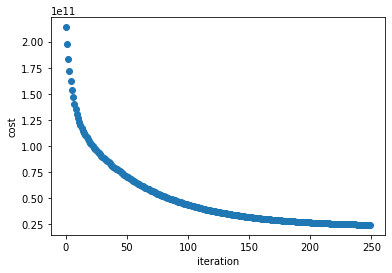

Parameters = [[439706.24239073]
 [ 12814.66006711]
 [ 28851.53881235]
 [ 48523.74027286]
 [ 65090.71936489]
 [ 99145.96545434]
 [ 42243.10068334]
 [ 27021.15708287]
 [ 85582.04086385]]


In [37]:
parameters = gradientDescent(x, y, 0.01, 250)        #SLR using sqft_living
print("Parameters = {}".format(parameters))

Final cost = 62664152046.4215
Final err = 43.836466841987146 %


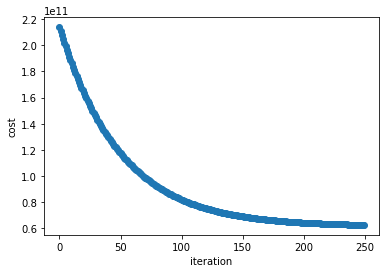

Parameters = [[495646.36940602]
 [106279.0398064 ]]


In [39]:
parameters = gradientDescent(a, b, 0.01, 250)         #SLR using bedrooms
print("Parameters = {}".format(parameters))

Final cost = 22119716306.106598
Final err = 24.39742415800725 %


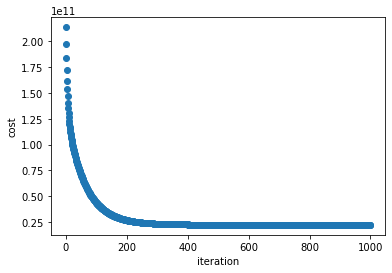

Parameters = [[505297.98436009]
 [ -2296.84227377]
 [  5452.4225748 ]
 [ 33635.77019237]
 [ 69303.88046068]
 [116299.24271175]
 [ 77409.22589816]
 [ 50004.43027546]
 [ 90067.44327491]]


In [59]:
parameters = gradientDescent(c, d, 0.01, 1000)       #MLR using selective features
print("Parameters = {}".format(parameters))

In [43]:
error = ((abs(np_y_train - y_predicted_train) / (np_y_train)).mean()) * 100
print("Train set error = {} %".format(error))

Train set error = 22.961641317353415 %


In [44]:
totalsamples = np_x_test.shape[0]                     #total samples (4229) 
columnofones = np.ones((totalsamples, 1))
x = np.c_[columnofones, np_x_test]                    #(4229, 8)

y_predicted_test = predictOutput(parameters, x)

In [64]:
RSS = np.sum((y_predicted_test - np_y_test)**2)             #risidual sum of squares
print("RSS = {}".format(RSS))

error = ((abs(np_y_test - y_predicted_test) / (np_y_test)).mean()) * 100
print("Test set error = {} %".format(error))

RSS = 192689628301675.44
Test set error = 23.26472287775382 %
